### MMDetection 설치

In [5]:
# https://mmcv.readthedocs.io/en/latest/get_started/installation.html 설치 과정 참조.
!pip install mmcv-full==1.6.0 -f https://download.openmmlab.com/mmcv/dist/cu113/torch1.12.0/index.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu113/torch1.12.0/index.html
     |████████████████████████████████| 40.1 MB 11.3 MB/s 
     |████████████████████████████████| 190 kB 4.7 MB/s 


In [6]:
# !pip install mmcv-full
!git clone https://github.com/open-mmlab/mmdetection.git
!cd mmdetection; python setup.py install

Cloning into 'mmdetection'...
remote: Enumerating objects: 28978, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 28978 (delta 8), reused 16 (delta 1), pack-reused 28948
Receiving objects: 100% (28978/28978), 39.42 MiB | 32.53 MiB/s, done.
Resolving deltas: 100% (20696/20696), done.
running install
running bdist_egg
running egg_info
creating mmdet.egg-info
writing mmdet.egg-info/PKG-INFO
writing dependency_links to mmdet.egg-info/dependency_links.txt
writing requirements to mmdet.egg-info/requires.txt
writing top-level names to mmdet.egg-info/top_level.txt
writing manifest file 'mmdet.egg-info/SOURCES.txt'
reading manifest template 'MANIFEST.in'
adding license file 'LICENSE'
writing manifest file 'mmdet.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/mmdet
copying mmdet/__init__.py -> build/lib/mmdet
c

In [1]:
# 런타임->런타임 다시 시작 후 아래 수행. 
from mmdet.apis import init_detector, inference_detector
import mmcv

### Oxford Pet Dataset 다운로드 
image와 annotations을 압축파일로 각각 download 수행. 

In [3]:
# 데이터 구조 복사
!git clone https://github.com/ml4py/dataset-iiit-pet

fatal: destination path 'dataset-iiit-pet' already exists and is not an empty directory.


In [1]:
# !wget https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
# !wget https://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz

--2022-07-27 23:44:45--  https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 500 Internal Server Error
2022-07-27 23:44:47 ERROR 500: Internal Server Error.

--2022-07-27 23:44:47--  https://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 500 Internal Server Error
2022-07-27 23:44:48 ERROR 500: Internal Server Error.



In [2]:
# /content/data 디렉토리를 만들고 해당 디렉토리에 다운로드 받은 압축 파일 풀기.
!mkdir /content/data
# !tar -xvf images.tar.gz -C /content/data
# !tar -xvf annotations.tar.gz -C /content/data

### 이미지 디렉토리와 annotation 파일 살펴 보기

In [ ]:
!ls -lia ./data/images/Abyss*.jpg

In [ ]:
!ls -lia ./data/images

In [ ]:
!cat ./data/annotations/xmls/Abyssinian_1.xml

<annotation><folder>OXIIIT</folder><filename>Abyssinian_1.jpg</filename><source><database>OXFORD-IIIT Pet Dataset</database><annotation>OXIIIT</annotation><image>flickr</image></source><size><width>600</width><height>400</height><depth>3</depth></size><segmented>0</segmented><object><name>cat</name><pose>Frontal</pose><truncated>0</truncated><occluded>0</occluded><bndbox><xmin>333</xmin><ymin>72</ymin><xmax>425</xmax><ymax>158</ymax></bndbox><difficult>0</difficult></object></annotation>


In [3]:
import glob
import xml.etree.ElementTree as ET

# annotation xml 파일 파싱해서 bbox정보 추출
def get_bboxes_from_xml_test(xml_file):
  tree = ET.parse(xml_file)
  root = tree.getroot()
  bbox_names = []
  bboxes = []
  # 파일내에 있는 모든 object Element를 찾음. 
  for obj in root.findall('object'):

    bbox_name = obj.find('name').text
    xmlbox = obj.find('bndbox')
    x1 = int(xmlbox.find('xmin').text)
    y1 = int(xmlbox.find('ymin').text)
    x2 = int(xmlbox.find('xmax').text)
    y2 = int(xmlbox.find('ymax').text)

    bbox_names.append(bbox_name)
    bboxes.append([x1, y1, x2, y2])

  return bbox_names, bboxes

get_bboxes_from_xml_test('./data/annotations/xmls/Abyssinian_1.xml')

(['cat'], [[333, 72, 425, 158]])

In [ ]:
!ls -lia ./data/annotations/xmls/Abys*.xml

4597963 -rw-r--r-- 1 501 staff 495 Jun 29  2012 ./data/annotations/xmls/Abyssinian_100.xml
4597964 -rw-r--r-- 1 501 staff 494 Jun 29  2012 ./data/annotations/xmls/Abyssinian_101.xml
4597965 -rw-r--r-- 1 501 staff 494 Jun 29  2012 ./data/annotations/xmls/Abyssinian_102.xml
4597966 -rw-r--r-- 1 501 staff 495 Jun 29  2012 ./data/annotations/xmls/Abyssinian_103.xml
4597967 -rw-r--r-- 1 501 staff 496 Jun 29  2012 ./data/annotations/xmls/Abyssinian_105.xml
4597968 -rw-r--r-- 1 501 staff 499 Jun 29  2012 ./data/annotations/xmls/Abyssinian_106.xml
4597969 -rw-r--r-- 1 501 staff 494 Jun 29  2012 ./data/annotations/xmls/Abyssinian_107.xml
4597970 -rw-r--r-- 1 501 staff 494 Jun 29  2012 ./data/annotations/xmls/Abyssinian_108.xml
4597971 -rw-r--r-- 1 501 staff 493 Jun 29  2012 ./data/annotations/xmls/Abyssinian_109.xml
4597962 -rw-r--r-- 1 501 staff 494 Jun 29  2012 ./data/annotations/xmls/Abyssinian_10.xml
4597973 -rw-r--r-- 1 501 staff 493 Jun 29  2012 ./data/annotations/xmls/Abyssinian_110.xml


### train, val image/annotation 메타 파일 보기
* train과 valid 데이터로 나뉠 image와 annotation의 파일명을 가지는 메타 파일
* train과 valid용 meta 파일을 별도로 만듬. 

In [4]:
!cd ./data/annotations; cat trainval.txt

Abyssinian_100 1 1 1
Abyssinian_101 1 1 1
Abyssinian_102 1 1 1
Abyssinian_103 1 1 1
Abyssinian_104 1 1 1
Abyssinian_105 1 1 1
Abyssinian_106 1 1 1
Abyssinian_107 1 1 1
Abyssinian_108 1 1 1
Abyssinian_109 1 1 1
Abyssinian_10 1 1 1
Abyssinian_110 1 1 1
Abyssinian_111 1 1 1
Abyssinian_112 1 1 1
Abyssinian_113 1 1 1
Abyssinian_114 1 1 1
Abyssinian_115 1 1 1
Abyssinian_116 1 1 1
Abyssinian_117 1 1 1
Abyssinian_118 1 1 1
Abyssinian_119 1 1 1
Abyssinian_11 1 1 1
Abyssinian_120 1 1 1
Abyssinian_121 1 1 1
Abyssinian_122 1 1 1
Abyssinian_123 1 1 1
Abyssinian_124 1 1 1
Abyssinian_125 1 1 1
Abyssinian_126 1 1 1
Abyssinian_127 1 1 1
Abyssinian_128 1 1 1
Abyssinian_129 1 1 1
Abyssinian_12 1 1 1
Abyssinian_130 1 1 1
Abyssinian_131 1 1 1
Abyssinian_132 1 1 1
Abyssinian_133 1 1 1
Abyssinian_134 1 1 1
Abyssinian_135 1 1 1
Abyssinian_136 1 1 1
Abyssinian_137 1 1 1
Abyssinian_138 1 1 1
Abyssinian_139 1 1 1
Abyssinian_13 1 1 1
Abyssinian_140 1 1 1
Abyssinian_141 1 1 1
Abyssinian_142 1 1 1
Abyssinian_143 1 

In [5]:
import pandas as pd
# 메타파일을(train, valid) 만들어 한개의 중립 포맷으로 형식화 
# txt 파일을 콤마 단위로 컬럼을 만듦
pet_df = pd.read_csv('./data/annotations/trainval.txt', sep=' ', header=None, names=['img_name', 'class_id', 'etc1', 'etc2'])
pet_df.head()

,img_name,class_id,etc1,etc2
0,Abyssinian_100,1,1,1
1,Abyssinian_101,1,1,1
2,Abyssinian_102,1,1,1
3,Abyssinian_103,1,1,1
4,Abyssinian_104,1,1,1


In [ ]:
pet_df['class_id'].value_counts()

37    100
22    100
34    100
32    100
30    100
28    100
26    100
24    100
20    100
35    100
18    100
16    100
14    100
10    100
6     100
4     100
36    100
1     100
3     100
19    100
31    100
29    100
27    100
25    100
5     100
21    100
17    100
15    100
11    100
9     100
7     100
2     100
33     99
23     96
13     96
8      96
12     93
Name: class_id, dtype: int64

In [6]:
# 이미지에 대한 xml파일엔 class name이 아닌 object name만 있기에 class name을 도출하기 위해 매핑되는 trainval 파일로 도출
# apply는 로우씩 적용-해당 컬럼의 값을 x로 두었을 때 해당 값의 인덱스 0부터 '_' 전까지 인덱싱하여 전처리
pet_df['class_name'] = pet_df['img_name'].apply(lambda x:x[:x.rfind('_')])
pet_df.head()

,img_name,class_id,etc1,etc2,class_name
0,Abyssinian_100,1,1,1,Abyssinian
1,Abyssinian_101,1,1,1,Abyssinian
2,Abyssinian_102,1,1,1,Abyssinian
3,Abyssinian_103,1,1,1,Abyssinian
4,Abyssinian_104,1,1,1,Abyssinian


In [8]:
from sklearn.model_selection import train_test_split

# 해당 데이터프레임을 9:1로 train과 val 나눔-각 클래스에 대한 비율은 동일하게
train_df, val_df = train_test_split(pet_df, test_size=0.1, stratify=pet_df['class_id'], random_state=2021)

In [9]:
print(train_df['class_id'].value_counts(), val_df['class_id'].value_counts())

11    90
19    90
2     90
27    90
6     90
31    90
16    90
26    90
22    90
36    90
28    90
5     90
35    90
9     90
32    90
37    90
1     90
14    90
34    90
7     90
20    90
29    90
21    90
4     90
25    90
10    90
3     90
15    90
17    90
30    90
24    90
18    90
33    89
23    87
8     86
13    86
12    84
Name: class_id, dtype: int64 19    10
29    10
4     10
11    10
13    10
37    10
27    10
22    10
14    10
8     10
16    10
35    10
2     10
31    10
33    10
30    10
18    10
24    10
3     10
17    10
28    10
25    10
9     10
32    10
21    10
26    10
36    10
10    10
20    10
1     10
34    10
7     10
5     10
15    10
6     10
23     9
12     9
Name: class_id, dtype: int64


In [10]:
# 각 데이터프레임의 img_name의 숫자를 기준으로 정렬
train_df = train_df.sort_values(by='img_name')
val_df = val_df.sort_values(by='img_name')

In [11]:
# ann_file로 주어지는 메타파일은 가급적이면 소스데이터의 가장 상단 디렉토리에 저장하는 것이 바람직. 
# 정렬된 train, val 데이터프레임의 이름만 txt 파일로 저장-해당 컬럼값으로 train과 val img_name 가지고 이미지 파일이나 xml 파일 이름을 매핑
train_df['img_name'].to_csv('./data/train.txt', sep=' ', header=False, index=False)
val_df['img_name'].to_csv('./data/val.txt', sep=' ', header=False, index=False)

In [ ]:
# 클래스 이름 유일 값들만 리스트에 담음-class 지정
pet_classes_list = pet_df['class_name'].unique().tolist()
print(pet_classes_list)

['Abyssinian', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'Bengal', 'Birman', 'Bombay', 'boxer', 'British_Shorthair', 'chihuahua', 'Egyptian_Mau', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'Maine_Coon', 'miniature_pinscher', 'newfoundland', 'Persian', 'pomeranian', 'pug', 'Ragdoll', 'Russian_Blue', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'Siamese', 'Sphynx', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


In [ ]:
!echo 'train list #####'; cat ./data/train.txt

train list #####
Abyssinian_1
Abyssinian_10
Abyssinian_101
Abyssinian_102
Abyssinian_103
Abyssinian_104
Abyssinian_105
Abyssinian_106
Abyssinian_107
Abyssinian_108
Abyssinian_109
Abyssinian_110
Abyssinian_111
Abyssinian_112
Abyssinian_113
Abyssinian_114
Abyssinian_115
Abyssinian_116
Abyssinian_117
Abyssinian_118
Abyssinian_119
Abyssinian_12
Abyssinian_120
Abyssinian_121
Abyssinian_123
Abyssinian_124
Abyssinian_125
Abyssinian_126
Abyssinian_128
Abyssinian_129
Abyssinian_13
Abyssinian_130
Abyssinian_131
Abyssinian_132
Abyssinian_133
Abyssinian_134
Abyssinian_135
Abyssinian_136
Abyssinian_137
Abyssinian_138
Abyssinian_139
Abyssinian_14
Abyssinian_141
Abyssinian_142
Abyssinian_143
Abyssinian_144
Abyssinian_145
Abyssinian_146
Abyssinian_148
Abyssinian_149
Abyssinian_15
Abyssinian_150
Abyssinian_151
Abyssinian_152
Abyssinian_154
Abyssinian_155
Abyssinian_156
Abyssinian_157
Abyssinian_159
Abyssinian_16
Abyssinian_160
Abyssinian_161
Abyssinian_164
Abyssinian_165
Abyssinian_166
Abyssinian_167
A

In [ ]:
!echo ' valid list ###'; cat ./data/val.txt

 valid list ###
Abyssinian_100
Abyssinian_11
Abyssinian_122
Abyssinian_127
Abyssinian_140
Abyssinian_153
Abyssinian_158
Abyssinian_182
Abyssinian_190
Abyssinian_193
Bengal_112
Bengal_127
Bengal_128
Bengal_139
Bengal_143
Bengal_145
Bengal_149
Bengal_169
Bengal_180
Bengal_190
Birman_113
Birman_120
Birman_123
Birman_145
Birman_149
Birman_151
Birman_159
Birman_160
Birman_171
Birman_190
Bombay_10
Bombay_110
Bombay_121
Bombay_122
Bombay_129
Bombay_133
Bombay_140
Bombay_143
Bombay_168
Bombay_174
British_Shorthair_103
British_Shorthair_136
British_Shorthair_141
British_Shorthair_15
British_Shorthair_155
British_Shorthair_17
British_Shorthair_18
British_Shorthair_185
British_Shorthair_199
British_Shorthair_209
Egyptian_Mau_100
Egyptian_Mau_102
Egyptian_Mau_111
Egyptian_Mau_118
Egyptian_Mau_127
Egyptian_Mau_154
Egyptian_Mau_161
Egyptian_Mau_192
Egyptian_Mau_193
Maine_Coon_112
Maine_Coon_129
Maine_Coon_132
Maine_Coon_153
Maine_Coon_173
Maine_Coon_193
Maine_Coon_196
Maine_Coon_197
Maine_Coon_207
M

### mmdetection의 중립 annotation 포맷 변환
* CLASSES 는 pet_df의 'class_name' 컬럼에 unique 데이터로 지정. class id는 tuple(list)형의 CLASSES의 index값에 따라 설정. 
* ann_file로 입력되는 메타 파일을 읽어서 개별 image정보와 ann 정보를 dict로 생성하여 data_infos list에 입력
* 개별 XML 읽어서 ann 정보를 만드는 것은 get_bboxes_from_xml() 함수 이용. 
* 디버깅용으로 CustomDataset을 만들어서 미리 테스트 하는 방법도 고려. 

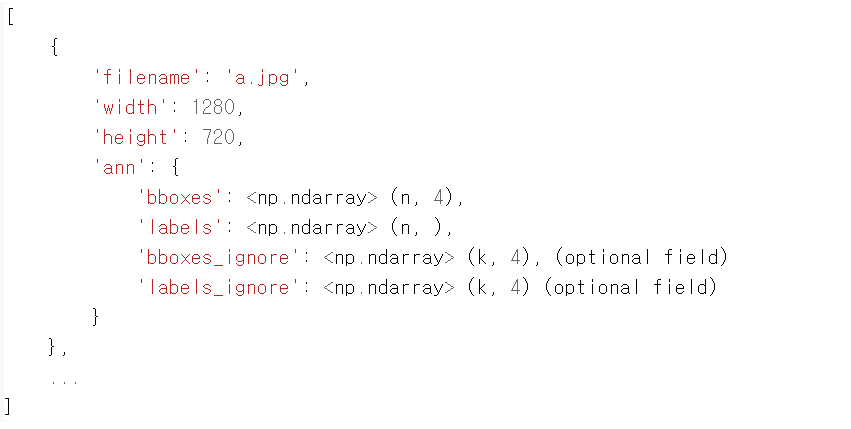

In [1]:
import xml.etree.ElementTree as ET

# 1개의 annotation 파일에서 bbox 정보 추출. 여러개의 object가 있을 경우 이들 object의 name과 bbox 좌표들을 list로 반환.
def get_bboxes_from_xml(anno_dir, xml_file):
  anno_xml_file = osp.join(anno_dir, xml_file)
  tree = ET.parse(anno_xml_file)
  root = tree.getroot()
  bbox_names = []
  bboxes = []

  # 파일내에 있는 모든 object Element를 찾음. 
  for obj in root.findall('object'):
    #obj.find('name').text는 cat 이나 dog을 반환     
    #bbox_name = obj.find('name').text
    # object의 클래스명은 파일명에서 추출. 
    bbox_name = xml_file[:xml_file.rfind('_')]

    xmlbox = obj.find('bndbox')
    x1 = int(xmlbox.find('xmin').text)
    y1 = int(xmlbox.find('ymin').text)
    x2 = int(xmlbox.find('xmax').text)
    y2 = int(xmlbox.find('ymax').text)

    bboxes.append([x1, y1, x2, y2])
    bbox_names.append(bbox_name)

  return bbox_names, bboxes

In [2]:
import copy
import os.path as osp

import mmcv
import numpy as np
import cv2

from mmdet.datasets.builder import DATASETS
from mmdet.datasets.custom import CustomDataset

import xml.etree.ElementTree as ET

PET_CLASSES = pet_df['class_name'].unique().tolist()

# MMDetection 프레임워크에 등록
@DATASETS.register_module(force=True)
class PetDataset(CustomDataset):
  CLASSES = PET_CLASSES

  # annotation에 대한 모든 파일명을 가지고 있는 텍스트 파일을 __init__(self, ann_file)로 입력 받고, 
  # 이 self.ann_file이 load_annotations()의 인자로 입력
  def load_annotations(self, ann_file):
    cat2label = {k:i for i, k in enumerate(self.CLASSES)}
    # self.ann_file은 곧 train, val 용 메타파일(for 어노테이션)
    image_list = mmcv.list_from_file(self.ann_file)
    # 포맷 중립 데이터를 담을 list 객체
    data_infos = []

    for image_id in image_list:
      # self.img_prefix는 images 가 입력될 것임-이미지 경로. 
      filename = '{0:}/{1:}.jpg'.format(self.img_prefix, image_id)
      # 원본 이미지의 너비, 높이를 image를 직접 로드하여 구함. 
      image = cv2.imread(filename)
      height, width = image.shape[:2]
      # 개별 image의 annotation 정보 저장용 Dict 생성. key값 filename에는 image의 파일명만 들어감(디렉토리는 제외)
      # 영상에는 data_info = {'filename': filename 으로 되어 있으나 filename은 image 파일명만 들어가는게 맞음.
      data_info = {'filename': str(image_id) + '.jpg',
                  'width': width, 'height': height}
      # 개별 annotation XML 파일이 있는 서브 디렉토리의 prefix 변환. 
      label_prefix = self.img_prefix.replace('images', 'annotations')
      
      # 개별 annotation XML 파일을 1개 line 씩 읽어서 list 로드. annotation XML파일이 xmls 밑에 있음에 유의
      anno_xml_file = osp.join(label_prefix, 'xmls/'+str(image_id)+'.xml')
      # 메타 파일에는 이름이 있으나 실제로는 존재하지 않는 XML이 있으므로 이는 제외. 
      if not osp.exists(anno_xml_file):
          continue
      
      # get_bboxes_from_xml() 를 이용하여 개별 XML 파일에 있는 이미지의 모든 bbox 정보를 list 객체로 생성. 
      anno_dir = osp.join(label_prefix, 'xmls')
      bbox_names, bboxes = get_bboxes_from_xml(anno_dir, str(image_id)+'.xml')
      #print('#########:', bbox_names)
                  
      gt_bboxes = []
      gt_labels = []
      gt_bboxes_ignore = []
      gt_labels_ignore = []
        
      # bbox별 Object들의 class name을 class id로 매핑. class id는 tuple(list)형의 CLASSES의 index값에 따라 설정
      for bbox_name, bbox in zip(bbox_names, bboxes):
        # 만약 bbox_name이 클래스명에 해당 되면, gt_bboxes와 gt_labels에 추가, 그렇지 않으면 gt_bboxes_ignore, gt_labels_ignore에 추가
        # bbox_name이 CLASSES중에 반드시 하나 있어야 함. 안 그러면 FILTERING 되므로 주의 할것. 
        if bbox_name in cat2label:
            gt_bboxes.append(bbox)
            # gt_labels에는 class id를 입력
            gt_labels.append(cat2label[bbox_name])
        else:
            gt_bboxes_ignore.append(bbox)
            gt_labels_ignore.append(-1)
      
      # 개별 image별 annotation 정보를 가지는 Dict 생성. 해당 Dict의 value값을 np.array형태로 bbox의 좌표와 label값으로 생성. 
      data_anno = {
        'bboxes': np.array(gt_bboxes, dtype=np.float32).reshape(-1, 4),
        'labels': np.array(gt_labels, dtype=np.long),
        'bboxes_ignore': np.array(gt_bboxes_ignore, dtype=np.float32).reshape(-1, 4),
        'labels_ignore': np.array(gt_labels_ignore, dtype=np.long)
      }
      
      # image에 대한 메타 정보를 가지는 data_info Dict에 'ann' key값으로 data_anno를 value로 저장. 
      data_info.update(ann=data_anno)
      # 전체 annotation 파일들에 대한 정보를 가지는 data_infos에 data_info Dict를 추가
      data_infos.append(data_info)
      #print(data_info)

    return data_infos


ModuleNotFoundError: ignored

In [3]:
''' 디버깅 용도로 CustomDataset을 흉내낸 클래스를 생성하여 다양한 테스트를 수행 가능 '''

import os.path as osp

PET_CLASSES = pet_df['class_name'].unique().tolist()

# 디버깅 용도로 CustomDataset을 흉내낸 클래스 생성. 
class PetDataset_imsi():
  CLASSES = PET_CLASSES

  # 생성자 함수 생성. 
  def __init__(self, data_root, ann_file, img_prefix):
      self.data_root = data_root
      self.ann_file = osp.join(data_root, ann_file)
      self.img_prefix = osp.join(data_root, img_prefix)
      
      self.data_infos = self.load_annotations(self.ann_file)

  # annotation에 대한 모든 파일명을 가지고 있는 텍스트 파일을 __init__(self, ann_file)로 입력 받고, 
  # 이 self.ann_file이 load_annotations()의 인자로 입력
  def load_annotations(self, ann_file):
    cat2label = {k:i for i, k in enumerate(self.CLASSES)}
    image_list = mmcv.list_from_file(self.ann_file)
    # 포맷 중립 데이터를 담을 list 객체
    data_infos = []

    for image_id in image_list:
      # self.img_prefix는 images 가 입력될 것임. 
      filename = '{0:}/{1:}.jpg'.format(self.img_prefix, image_id)
      # 원본 이미지의 너비, 높이를 image를 직접 로드하여 구함. 
      image = cv2.imread(filename)
      height, width = image.shape[:2]
      # 개별 image의 annotation 정보 저장용 Dict 생성. key값 filename에는 image의 파일명만 들어감(디렉토리는 제외)
      # 영상에는 data_info = {'filename': filename 으로 되어 있으나 filename은 image 파일명만 들어가는게 맞음. 
      data_info = {'filename': str(image_id) + '.jpg', 
                  'width': width, 'height': height}
      # 개별 annotation XML 파일이 있는 서브 디렉토리의 prefix 변환. 
      label_prefix = self.img_prefix.replace('images', 'annotations')
      
      # 개별 annotation XML 파일을 1개 line 씩 읽어서 list 로드. annotation XML파일이 xmls 밑에 있음에 유의
      anno_xml_file = osp.join(label_prefix, 'xmls/'+str(image_id)+'.xml')
      # 메타 파일에는 이름이 있으나 실제로는 존재하지 않는 XML이 있으므로 이는 제외. 
      if not osp.exists(anno_xml_file):
          continue
      
      # get_bboxes_from_xml() 를 이용하여 개별 XML 파일에 있는 이미지의 모든 bbox 정보를 list 객체로 생성. 
      anno_dir = osp.join(label_prefix, 'xmls')
      bbox_names, bboxes = get_bboxes_from_xml(anno_dir, str(image_id)+'.xml')
      #print('#########:', bbox_names)
                  
      gt_bboxes = []
      gt_labels = []
      gt_bboxes_ignore = []
      gt_labels_ignore = []
        
      # bbox별 Object들의 class name을 class id로 매핑. class id는 tuple(list)형의 CLASSES의 index값에 따라 설정
      for bbox_name, bbox in zip(bbox_names, bboxes):
        # 만약 bbox_name이 클래스명에 해당 되면, gt_bboxes와 gt_labels에 추가, 그렇지 않으면 gt_bboxes_ignore, gt_labels_ignore에 추가
        # bbox_name이 CLASSES중에 반드시 하나 있어야 함. 안 그러면 FILTERING 되므로 주의 할것. 
        if bbox_name in cat2label:
            gt_bboxes.append(bbox)
            # gt_labels에는 class id를 입력
            gt_labels.append(cat2label[bbox_name])
        else:
            gt_bboxes_ignore.append(bbox)
            gt_labels_ignore.append(-1)
      
      # 개별 image별 annotation 정보를 가지는 Dict 생성. 해당 Dict의 value값을 np.array형태로 bbox의 좌표와 label값으로 생성. 
      data_anno = {
        'bboxes': np.array(gt_bboxes, dtype=np.float32).reshape(-1, 4),
        'labels': np.array(gt_labels, dtype=np.long),
        'bboxes_ignore': np.array(gt_bboxes_ignore, dtype=np.float32).reshape(-1, 4),
        'labels_ignore': np.array(gt_labels_ignore, dtype=np.long)
      }
      
      # image에 대한 메타 정보를 가지는 data_info Dict에 'ann' key값으로 data_anno를 value로 저장. 
      data_info.update(ann=data_anno)
      # 전체 annotation 파일들에 대한 정보를 가지는 data_infos에 data_info Dict를 추가
      data_infos.append(data_info)
      #print(data_info)

    return data_infos


NameError: ignored

In [ ]:
# 디버깅 용도로 생성한 클래스를 생성하고 data_infos를 10개만 추출하여 생성된 데이터 확인. 
train_ds = PetDataset_imsi(data_root='/content/data', ann_file='train.txt', img_prefix='images')
print(train_ds.data_infos[:10])

[{'filename': 'Abyssinian_1.jpg', 'width': 600, 'height': 400, 'ann': {'bboxes': array([[333.,  72., 425., 158.]], dtype=float32), 'labels': array([0]), 'bboxes_ignore': array([], shape=(0, 4), dtype=float32), 'labels_ignore': array([], dtype=int64)}}, {'filename': 'Abyssinian_10.jpg', 'width': 375, 'height': 500, 'ann': {'bboxes': array([[ 72., 105., 288., 291.]], dtype=float32), 'labels': array([0]), 'bboxes_ignore': array([], shape=(0, 4), dtype=float32), 'labels_ignore': array([], dtype=int64)}}, {'filename': 'Abyssinian_101.jpg', 'width': 450, 'height': 313, 'ann': {'bboxes': array([[ 54.,  36., 319., 235.]], dtype=float32), 'labels': array([0]), 'bboxes_ignore': array([], shape=(0, 4), dtype=float32), 'labels_ignore': array([], dtype=int64)}}, {'filename': 'Abyssinian_102.jpg', 'width': 500, 'height': 465, 'ann': {'bboxes': array([[ 23.,  27., 325., 320.]], dtype=float32), 'labels': array([0]), 'bboxes_ignore': array([], shape=(0, 4), dtype=float32), 'labels_ignore': array([], dt

### Config를 설정하고 COCO로 Pretrained 된 모델을 Download
* config파일은 faster rcnn resnet 50 backbone 사용. 
* Oxford Pet 데이터는 학습에 시간에 소모 되므로 학습으로 생성된 모델을 Google Drive에 저장

In [ ]:
config_file = './mmdetection/configs/faster_rcnn/faster_rcnn_r50_fpn_1x_coco.py'
checkpoint_file = './mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'

In [ ]:
!cd mmdetection; mkdir checkpoints
!wget -O ./mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth http://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth

mkdir: cannot create directory ‘checkpoints’: File exists
--2021-07-27 11:36:47--  http://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.252.96.35
Connecting to download.openmmlab.com (download.openmmlab.com)|47.252.96.35|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 167287506 (160M) [application/octet-stream]
Saving to: ‘./mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth’

./mmdetection/check 100%[===================>] 159.54M  9.09MB/s    in 18s     

2021-07-27 11:37:06 (8.87 MB/s) - ‘./mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth’ saved [167287506/167287506]



In [ ]:
from mmcv import Config

cfg = Config.fromfile(config_file)
print(cfg.pretty_text)

model = dict(
    type='FasterRCNN',
    backbone=dict(
        type='ResNet',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=True,
        style='pytorch',
        init_cfg=dict(type='Pretrained', checkpoint='torchvision://resnet50')),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5, 1.0, 2.0],
            strides=[4, 8, 16, 32, 64]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[0.0, 0.0, 0.0, 0.0],
            target_stds=[1.0, 1.0, 1.0, 1.0]),
        loss_cls=dict(
            type='CrossEntropyLoss', use_sigmoid=True, loss_weight=1.

In [ ]:
# Google Drive 접근을 위한 Mount 적용. 
import os, sys 
from google.colab import drive 

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# soft link로 Google Drive Directory 연결. 
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

ln: failed to create symbolic link '/mydrive/My Drive': File exists
 101_ObjectCategories		      sea_depth.zip
 오라클과_ADML_강의		      test_colab01.ipynb
 application_test.csv		      torch_efficientdet.ipynb
 application_train.csv		      Training400
 bkup				      train_santander.csv
'Colab Notebooks'		      ultra_workdir
 credit_card_balance.csv	      Untitled
 download			      Untitled0.ipynb
 efficientdet01.ipynb		      Untitled10.ipynb
 esri_work_dir			      Untitled11.ipynb
 face_mask.zip			      Untitled12.ipynb
 HomeCredit_columns_description.csv   Untitled13.ipynb
 installments_payments.csv	      Untitled14.ipynb
 kaggle.json			      Untitled15.ipynb
 mask_work_dir			      Untitled16.ipynb
 melanoma_jpeg.zip		      Untitled17.ipynb
 models				      Untitled1.ipynb
 models_imsi			      Untitled2.ipynb
 model_trained			      Untitled3.ipynb
 model_trained_d2		      Untitled4.ipynb
'My Drive'			      Untitled5.ipynb
 pet_work_dir			      Untitled6.ipynb
 POS_CASH_balance.csv	

In [ ]:
# Google Drive 밑에 Directory 생성. 이미 생성 되어 있을 시 오류 발생. 
!mkdir "/mydrive/pet_work_dir"

mkdir: cannot create directory ‘/mydrive/pet_work_dir’: File exists


In [ ]:
!nvidia-smi

Tue Jul 27 11:37:16 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    29W / 250W |      2MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from mmdet.apis import set_random_seed

# dataset에 대한 환경 파라미터 수정. 
cfg.dataset_type = 'PetDataset'
cfg.data_root = '/content/data/'

# train, val, test dataset에 대한 type, data_root, ann_file, img_prefix 환경 파라미터 수정. 
cfg.data.train.type = 'PetDataset'
cfg.data.train.data_root = '/content/data/'
cfg.data.train.ann_file = 'train.txt'
cfg.data.train.img_prefix = 'images'

cfg.data.val.type = 'PetDataset'
cfg.data.val.data_root = '/content/data/'
cfg.data.val.ann_file = 'val.txt'
cfg.data.val.img_prefix = 'images'

# class의 갯수 수정. 
cfg.model.roi_head.bbox_head.num_classes = 37
# pretrained 모델
cfg.load_from = 'checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'

# 학습 weight 파일로 로그를 저장하기 위한 디렉토리로 구글 Drive 설정. 
cfg.work_dir = '/mydrive/pet_work_dir'

# 학습율 변경 환경 파라미터 설정-기존의 8개의 GPU를 쓴 것을 현재는 1개의 GPU로 사용하기에. 
cfg.optimizer.lr = 0.02 / 8
cfg.lr_config.warmup = None
cfg.log_config.interval = 5

cfg.runner.max_epochs = 5

# 평가 metric 설정. 
cfg.evaluation.metric = 'mAP'
# 평가 metric 수행할 epoch interval 설정-에포크 5회 후, evaluation 수행-mAP. 
cfg.evaluation.interval = 5
# 5회 에포크 후, 모델 weight 저장-cfg.work_dir에. 
cfg.checkpoint_config.interval = 5

# 학습 시 Batch size 설정(단일 GPU 별 Batch size로 설정됨)
cfg.data.samples_per_gpu = 4

# Set seed thus the results are more reproducible
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)
# 두번 config를 로드하면 lr_config의 policy가 사라지는 오류로 인하여 설정. 
cfg.lr_config.policy='step'
# We can initialize the logger for training and have a look
# at the final config used for training
print(f'Config:\n{cfg.pretty_text}')

Config:
model = dict(
    type='FasterRCNN',
    backbone=dict(
        type='ResNet',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=True,
        style='pytorch',
        init_cfg=dict(type='Pretrained', checkpoint='torchvision://resnet50')),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5, 1.0, 2.0],
            strides=[4, 8, 16, 32, 64]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[0.0, 0.0, 0.0, 0.0],
            target_stds=[1.0, 1.0, 1.0, 1.0]),
        loss_cls=dict(
            type='CrossEntropyLoss', use_sigmoid=True, loss_w

### Train용 데이터를 생성하고 Oxford Dataset을 학습수행. 
* build_dataset()로 train config 설정에 따른 Train용 dataset 생성. 
* build_detector()로 train과 test config반영하여 model 생성. 
* train_detector()로 model 학습.  

In [ ]:
from mmdet.datasets import build_dataset
from mmdet.models import build_detector
from mmdet.apis import train_detector

# train용 Dataset 생성. 
datasets = [build_dataset(cfg.data.train)]

/usr/local/lib/python3.7/dist-packages/mmdet-2.14.0-py3.7.egg/mmdet/datasets/custom.py:156: UserWarning: CustomDataset does not support filtering empty gt images.
  'CustomDataset does not support filtering empty gt images.')


In [ ]:
datasets

[
 PetDataset Train dataset with number of images 3304, and instance counts: 
 +-----------------------+-------+-------------------------+-------+-------------------------------+-------+---------------------+-------+---------------------------------+-------+
 | category              | count | category                | count | category                      | count | category            | count | category                        | count |
 +-----------------------+-------+-------------------------+-------+-------------------------------+-------+---------------------+-------+---------------------------------+-------+
 | 0 [Abyssinian]        | 89    | 1 [american_bulldog]    | 90    | 2 [american_pit_bull_terrier] | 90    | 3 [basset_hound]    | 90    | 4 [beagle]                      | 90    |
 | 5 [Bengal]            | 89    | 6 [Birman]              | 90    | 7 [Bombay]                    | 86    | 8 [boxer]           | 90    | 9 [British_Shorthair]           | 90    |
 | 10 [chihuahua]

In [ ]:
%cd mmdetection

model = build_detector(cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))
model.CLASSES = datasets[0].CLASSES

mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
# epochs는 config의 runner 파라미터로 지정됨. 기본 12회 
# 출력되는 것은 각 에포크 당, 배치사이즈에 의한 전체 데이터 interation(827)과 배치사이즈(4) 단위 5개씩 수행후 결과 출력(5 단위 증가) 
# eta-예상 소요 시간
# 바운딩 박스, classification, 오브젝트 여부 로스 등 상세 정보 출력
train_detector(model, datasets, cfg, distributed=False, validate=True)

[Errno 2] No such file or directory: 'mmdetection'
/content/mmdetection


/usr/local/lib/python3.7/dist-packages/mmdet-2.14.0-py3.7.egg/mmdet/core/anchor/builder.py:16: UserWarning: ``build_anchor_generator`` would be deprecated soon, please use ``build_prior_generator`` 
  '``build_anchor_generator`` would be deprecated soon, please use '
2021-07-27 11:42:30,722 - mmdet - INFO - load checkpoint from checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth
2021-07-27 11:42:30,723 - mmdet - INFO - Use load_from_local loader
2021-07-27 11:42:30,853 - mmdet - WARNING - The model and loaded state dict do not match exactly

size mismatch for roi_head.bbox_head.fc_cls.weight: copying a param with shape torch.Size([81, 1024]) from checkpoint, the shape in current model is torch.Size([38, 1024]).
size mismatch for roi_head.bbox_head.fc_cls.bias: copying a param with shape torch.Size([81]) from checkpoint, the shape in current model is torch.Size([38]).
size mismatch for roi_head.bbox_head.fc_reg.weight: copying a param with shape torch.Size([320, 1024]) from ch

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 367/367, 11.6 task/s, elapsed: 32s, ETA:     0s
---------------iou_thr: 0.5---------------


2021-07-27 12:29:43,253 - mmdet - INFO - 
+----------------------------+-----+------+--------+-------+
| class                      | gts | dets | recall | ap    |
+----------------------------+-----+------+--------+-------+
| Abyssinian                 | 10  | 63   | 0.900  | 0.364 |
| american_bulldog           | 10  | 60   | 1.000  | 0.717 |
| american_pit_bull_terrier  | 10  | 69   | 0.900  | 0.728 |
| basset_hound               | 10  | 56   | 1.000  | 0.857 |
| beagle                     | 10  | 77   | 0.900  | 0.662 |
| Bengal                     | 10  | 95   | 1.000  | 0.470 |
| Birman                     | 10  | 69   | 1.000  | 0.608 |
| Bombay                     | 10  | 73   | 0.900  | 0.738 |
| boxer                      | 10  | 93   | 1.000  | 0.371 |
| British_Shorthair          | 10  | 56   | 1.000  | 0.772 |
| chihuahua                  | 10  | 43   | 0.700  | 0.577 |
| Egyptian_Mau               | 9   | 52   | 0.889  | 0.378 |
| english_cocker_spaniel     | 10  | 62   |

In [ ]:
|!ls -lia /content/data/images/english_cocker_spaniel*

4595504 -rwxr-xr-x 1 1001 1001 164254 Jun 18  2012 /content/data/images/english_cocker_spaniel_100.jpg
4593817 -rwxr-xr-x 1 1001 1001 170083 Jun 18  2012 /content/data/images/english_cocker_spaniel_101.jpg
4594412 -rwxr-xr-x 1 1001 1001 241519 Jun 18  2012 /content/data/images/english_cocker_spaniel_102.jpg
4593696 -rwxr-xr-x 1 1001 1001  85720 Jun 18  2012 /content/data/images/english_cocker_spaniel_103.jpg
4596589 -rwxr-xr-x 1 1001 1001 166211 Jun 18  2012 /content/data/images/english_cocker_spaniel_104.jpg
4593349 -rwxr-xr-x 1 1001 1001 169179 Jun 18  2012 /content/data/images/english_cocker_spaniel_105.jpg
4593548 -rwxr-xr-x 1 1001 1001 130177 Jun 18  2012 /content/data/images/english_cocker_spaniel_106.jpg
4593656 -rwxr-xr-x 1 1001 1001 181511 Jun 18  2012 /content/data/images/english_cocker_spaniel_107.jpg
4592654 -rwxr-xr-x 1 1001 1001 148702 Jun 18  2012 /content/data/images/english_cocker_spaniel_108.jpg
4596817 -rwxr-xr-x 1 1001 1001  88457 Jun 18  2012 /content/data/images/e

### 학습된 model을 이용하여 inference 수행.
* 현재 memory에서 학습된 model 및 checkpoint 기록된 model을 loading하여 inference 수행.  

In [ ]:
from mmdet.apis import inference_detector, init_detector, show_result_pyplot

# BGR Image 사용 
img = cv2.imread('/content/data/images/Abyssinian_88.jpg')

model.cfg = cfg

result = inference_detector(model, img)
show_result_pyplot(model, img, result, score_thr=0.3)

In [ ]:
# 클래스 번호 순서대로 예측 bbox와 classfication 예측 확률값
result

In [ ]:
# 아래는 오류를 발생시킵니다. 현재 Customized학습된 모델의 inference시 image file로 인자가 주어졌을때 inference 오류 발생. 
# 모델에 입력 데이터는 경로적인 이미지 파일보다는 cv 등으로 읽어드린 데이터
img_path = '/content/data/images/Abyssinian_88.jpg'

model.cfg = cfg

result = inference_detector(model, img_path)
show_result_pyplot(model, img, result, score_thr=0.3)

### Checkpoint 저장된 model 파일을 로딩하고 이를 이용하여 Inference 수행. 

In [ ]:
from mmdet.apis import show_result_pyplot

checkpoint_file = '/mydrive/pet_work_dir/epoch_5.pth'

# checkpoint 저장된 model 파일을 이용하여 모델을 생성, 이때 Config는 위에서 update된 config 사용. 
# build_detector는 pretained 된 모델이거나 지정하지 않은 weight
model_ckpt = init_detector(cfg, checkpoint_file, device='cuda:0')
# BGR Image 사용 
img = cv2.imread('/content/data/images/Abyssinian_88.jpg')
#model_ckpt.cfg = cfg

result = inference_detector(model_ckpt, img)
show_result_pyplot(model_ckpt, img, result, score_thr=0.3)

### 여러개의 image들을 Inference 수행. 
* inference_detector(model, imgs) 에서 인자 imgs는 단일 이미지일 경우 string/array, 여러개의 이미지일 경우 list(string/array)를 입력
* show_result_pyplot(model_ckpt, img, result, score_thr=0.3)는 여러개의 이미지를 한번에 나타내기 어려우므로 별도의 시각화 함수 get_detected_img()를 이용

In [ ]:
val_df

In [ ]:
# 이미지 경로 컬럼에 절대 경로+해당 이미지명+확장자하여 개별 이미지에 대한 절대 경로 만듦
val_df['img_path'] = '/content/data/images/' + val_df['img_name'] + '.jpg'
val_df.head()

In [ ]:
# 해당 데이터프레임의 이미지 절대 경로에 Abyssinian 글자를 포함하는 데이터만 인덱싱
val_df[val_df['img_path'].str.contains('Abyssinian')]['img_path'].values

In [ ]:
val_paths = val_df[val_df['img_path'].str.contains('Abyssinian')]['img_path'].values
val_imgs = [cv2.imread(x) for x in val_paths]

In [ ]:
type(val_imgs), len(val_imgs), val_imgs[0].shape

In [ ]:
# 반환된 results는 개별 원소로 list를 가지는 list임. 
# 복수 개의 이미지를 inference 시, 리스트에 array 형식의 이미지 데이터 존재시켜야함
results = inference_detector(model_ckpt, val_imgs)

In [ ]:
# 입력 되는 이미지 개수만큼의 클래스별 예측 값들 존재
len(results), len(results[0]), results

In [ ]:
PET_CLASSES = pet_df['class_name'].unique().tolist()
labels_to_names_seq = {i:k for i, k in enumerate(PET_CLASSES)}

# model과 원본 이미지 array, filtering할 기준 class confidence score를 인자로 가지는 inference 시각화용 함수 생성. 
def get_detected_img(model, img_array,  score_threshold=0.3, is_print=True):
  # 인자로 들어온 image_array를 복사. 
  draw_img = img_array.copy()
  bbox_color=(0, 255, 0)
  text_color=(0, 0, 255)

  # model과 image array를 입력 인자로 inference detection 수행하고 결과를 results로 받음. 
  # results는 80개의 2차원 array(shape=(오브젝트갯수, 5))를 가지는 list. 
  results = inference_detector(model, img_array)

  # 80개의 array원소를 가지는 results 리스트를 loop를 돌면서 개별 2차원 array들을 추출하고 이를 기반으로 이미지 시각화 
  # results 리스트의 위치 index가 바로 COCO 매핑된 Class id. 여기서는 result_ind가 class id
  # 개별 2차원 array에 오브젝트별 좌표와 class confidence score 값을 가짐. 
  for result_ind, result in enumerate(results):
    # 개별 2차원 array의 row size가 0 이면 해당 Class id로 값이 없으므로 다음 loop로 진행. 
    if len(result) == 0:
      continue
    
    # 2차원 array에서 5번째 컬럼에 해당하는 값이 score threshold이며 이 값이 함수 인자로 들어온 score_threshold 보다 낮은 경우는 제외. 
    result_filtered = result[np.where(result[:, 4] > score_threshold)]
    
    # 해당 클래스 별로 Detect된 여러개의 오브젝트 정보가 2차원 array에 담겨 있으며, 이 2차원 array를 row수만큼 iteration해서 개별 오브젝트의 좌표값 추출. 
    for i in range(len(result_filtered)):
      # 좌상단, 우하단 좌표 추출. 
      left = int(result_filtered[i, 0])
      top = int(result_filtered[i, 1])
      right = int(result_filtered[i, 2])
      bottom = int(result_filtered[i, 3])
      caption = "{}: {:.4f}".format(labels_to_names_seq[result_ind], result_filtered[i, 4])
      cv2.rectangle(draw_img, (left, top), (right, bottom), color=bbox_color, thickness=2)
      cv2.putText(draw_img, caption, (int(left), int(top - 7)), cv2.FONT_HERSHEY_SIMPLEX, 0.6, text_color, 1)
      if is_print:
        print(caption)

  return draw_img

In [ ]:
import matplotlib.pyplot as plt

img_arr = cv2.imread('/content/data/images/Abyssinian_88.jpg')
detected_img = get_detected_img(model, img_arr,  score_threshold=0.3, is_print=True)
# detect 입력된 이미지는 bgr임. 이를 최종 출력시 rgb로 변환 
detected_img = cv2.cvtColor(detected_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 12))
plt.imshow(detected_img)

In [ ]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline 

def show_detected_images(model, img_arrays, ncols=5):
    figure, axs = plt.subplots(figsize=(22, 6), nrows=1, ncols=ncols)
    for i in range(ncols):
      detected_img = get_detected_img(model, img_arrays[i],  score_threshold=0.5, is_print=True)
      detected_img = cv2.cvtColor(detected_img, cv2.COLOR_BGR2RGB)
      #detected_img = cv2.resize(detected_img, (328, 328))
      axs[i].imshow(detected_img)

        
show_detected_images(model_ckpt, val_imgs[:5], ncols=5)
show_detected_images(model_ckpt, val_imgs[5:10], ncols=5)

In [ ]:
val_paths = val_df[val_df['img_path'].str.contains('Persian')]['img_path'].values
val_imgs = [cv2.imread(x) for x in val_paths]

show_detected_images(model_ckpt, val_imgs[:5], ncols=5)
show_detected_images(model_ckpt, val_imgs[5:10], ncols=5)